<a href="https://colab.research.google.com/github/dogukartal/IBM_AI_Labs/blob/main/Introduction%20to%20Neural%20Networks%20and%20PyTorch/Final%20Projects/Deep_Neural_Network_for_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network for Breast Cancer Classification
---

In [ ]:
%pip install ucimlrepo==0.0.7

## Load the Data

The Breast Cancer Wisconsin (Diagnostic)is a classic dataset contains 569 samples of breast cancer cells, each with 30 features. The dataset is divided into two classes: benign and malignant. The goal is to classify the breast cancer cells into one of the two classes.



In [3]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

display(X.head())
display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [5]:
display(f'X shape: {X.shape}') #The dataset has 569 samples and 30 features
display(f'y shape: {y.shape}') #The class labels are either 'M' (malignant) or 'B' (benign)

'X shape: (569, 30)'

'y shape: (569, 1)'

In [6]:
display(y['Diagnosis'].value_counts())

,count
Diagnosis,
B,357
M,212


In [7]:
import pandas as pd

# Combine features and target into a single DataFrame for easier manipulation
data = pd.concat([X, y], axis=1)

# Separate the two classes
data_B = data[data['Diagnosis'] == 'B']
data_M = data[data['Diagnosis'] == 'M']

# Select 200 samples from each class
data_B = data_B.sample(n=200, random_state=42)
data_M = data_M.sample(n=200, random_state=42)

# Combine the two classes
balanced_data = pd.concat([data_B, data_M])

display(balanced_data['Diagnosis'].value_counts())

,count
Diagnosis,
B,200
M,200


## Data Preprocessing

Data preprocessing involves separating the features and labels, splitting the data into training and test sets, and standardizing the feature values.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Separate features and targets
X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']

# Convert the targets to binary labels
y = y.map({'B': 0, 'M': 1})

display(X.head())
display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343


,Diagnosis
395,0
110,0
481,0
493,0
136,0


In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (320, 30)'

'y_train shape: (320,)'

'X_test shape: (80, 30)'

'y_test shape: (80,)'

In [15]:
from torch.utils.data import DataLoader, TensorDataset

# Standardize the data
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

## Build and Train the Neural Network Model


In [36]:
import torch.nn as nn

class ClassificationNet(nn.Module):
    def __init__(self, input_units=30, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)
print(model)

ClassificationNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


In [37]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [38]:
epochs = 5
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/5], Train Loss: 0.3178, Test Loss: 0.1909
Epoch [2/5], Train Loss: 0.1185, Test Loss: 0.1580
Epoch [3/5], Train Loss: 0.0826, Test Loss: 0.1592
Epoch [4/5], Train Loss: 0.0670, Test Loss: 0.1696
Epoch [5/5], Train Loss: 0.0580, Test Loss: 0.1764


## Visualize the Training and Test Loss


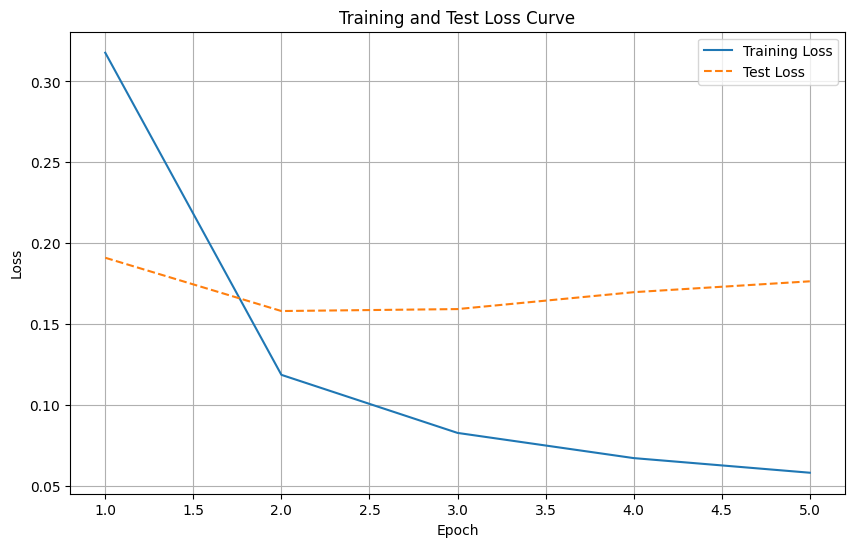

In [39]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

## SGD

Epoch [1/10], Train Loss: 0.3892, Test Loss: 0.2358
Epoch [2/10], Train Loss: 0.1861, Test Loss: 0.1797
Epoch [3/10], Train Loss: 0.1340, Test Loss: 0.1561
Epoch [4/10], Train Loss: 0.1104, Test Loss: 0.1461
Epoch [5/10], Train Loss: 0.0962, Test Loss: 0.1423
Epoch [6/10], Train Loss: 0.0860, Test Loss: 0.1408
Epoch [7/10], Train Loss: 0.0789, Test Loss: 0.1411
Epoch [8/10], Train Loss: 0.0732, Test Loss: 0.1412
Epoch [9/10], Train Loss: 0.0690, Test Loss: 0.1425
Epoch [10/10], Train Loss: 0.0652, Test Loss: 0.1437


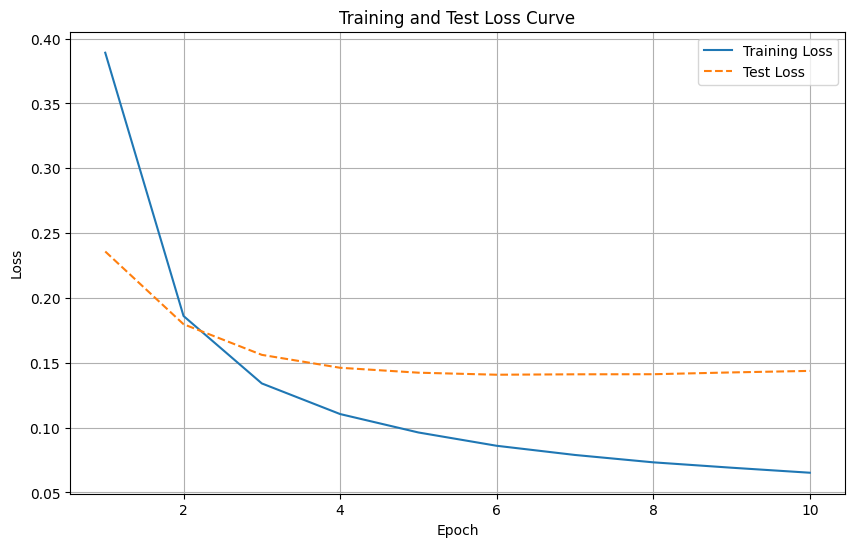

In [40]:
import torch.optim as optim

model_new_optimizer = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_new_optimizer.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model_new_optimizer.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new_optimizer(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model_new_optimizer.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new_optimizer(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

## Neural Network Size

Epoch [1/10], Train Loss: 0.4061, Test Loss: 0.2648
Epoch [2/10], Train Loss: 0.1616, Test Loss: 0.2062
Epoch [3/10], Train Loss: 0.1090, Test Loss: 0.1905
Epoch [4/10], Train Loss: 0.0877, Test Loss: 0.1949
Epoch [5/10], Train Loss: 0.0740, Test Loss: 0.1998
Epoch [6/10], Train Loss: 0.0672, Test Loss: 0.2064
Epoch [7/10], Train Loss: 0.0605, Test Loss: 0.2137
Epoch [8/10], Train Loss: 0.0545, Test Loss: 0.2296
Epoch [9/10], Train Loss: 0.0506, Test Loss: 0.2334
Epoch [10/10], Train Loss: 0.0472, Test Loss: 0.2442


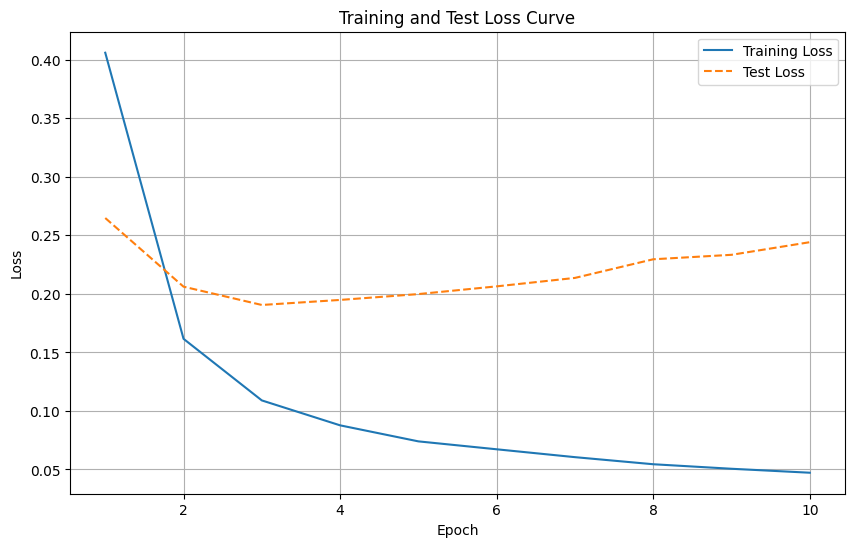

In [41]:
model_new = ClassificationNet(input_units=30, hidden_units=16, output_units=2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_new.parameters(), lr=0.001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model_new.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluation phase on test set
    model_new.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

## Iris Dataset

Epoch [1/10], Train Loss: 1.0368, Test Loss: 0.9977
Epoch [2/10], Train Loss: 0.9239, Test Loss: 0.8951
Epoch [3/10], Train Loss: 0.8215, Test Loss: 0.7916
Epoch [4/10], Train Loss: 0.7245, Test Loss: 0.6947
Epoch [5/10], Train Loss: 0.6289, Test Loss: 0.6135
Epoch [6/10], Train Loss: 0.5398, Test Loss: 0.5483
Epoch [7/10], Train Loss: 0.4860, Test Loss: 0.5002
Epoch [8/10], Train Loss: 0.4336, Test Loss: 0.4624
Epoch [9/10], Train Loss: 0.3950, Test Loss: 0.4308
Epoch [10/10], Train Loss: 0.3714, Test Loss: 0.4056


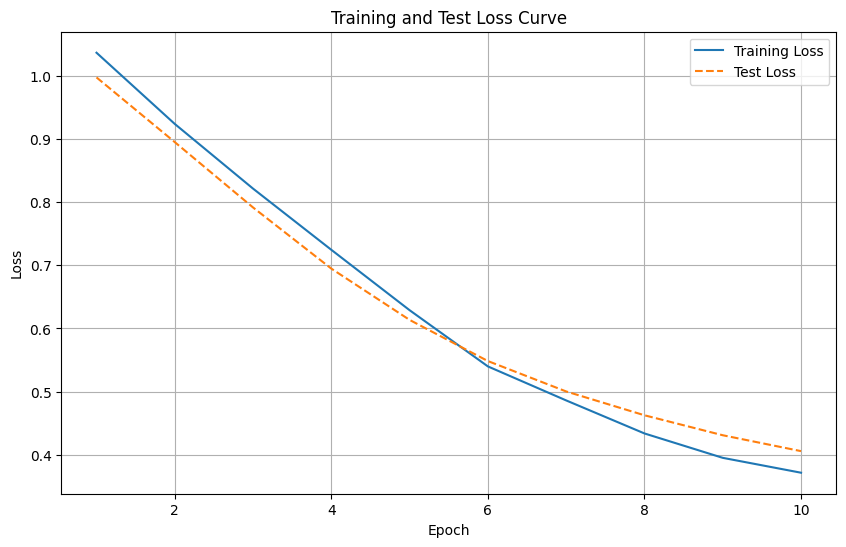

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class IrisNet(nn.Module):
    def __init__(self, hidden_units=8):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, hidden_units)  # 4 input features for Iris dataset
        self.fc2 = nn.Linear(hidden_units, 3)  # 3 output classes for Iris dataset

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the Iris dataset
iris = load_iris()

# Extract the features and target variable
X_iris = iris.data
y_iris = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = IrisNet(hidden_units=8)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluation phase on test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()